# question 8 

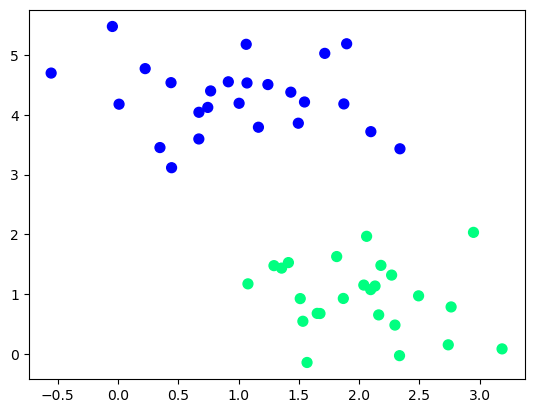

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

x, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='winter')
plt.show()



In [2]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [3]:
linear_svc = Pipeline((
                 ("scaler",StandardScaler()),
                 ("linear_svc", LinearSVC(C = 1, loss = "hinge"))
))

In [4]:
linear_svc.fit(x,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [5]:
linear_svc.predict([[2.2,1]])

array([1])

In [6]:
from sklearn.svm import SVC
svc = Pipeline((
                 ("scaler",StandardScaler()),
                 ("svc", SVC(kernel = "linear", C = 1))
))

In [7]:
svc.fit(x,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=1, kernel='linear'))])

In [8]:
svc.predict([[2.2,1]])

array([1])

In [9]:
from sklearn.linear_model import SGDClassifier

SGDClassifier = Pipeline((
                 ("scaler",StandardScaler()),
                 ("SGDClassifier", SGDClassifier(loss = "hinge" ))
))

In [10]:
SGDClassifier.fit(x,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('SGDClassifier', SGDClassifier())])

In [11]:
SGDClassifier.predict([[2.2,1]])

array([1])

In [12]:
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a linearly separable dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Train LinearSVC
linear_svc = LinearSVC(random_state=42)
linear_svc.fit(X_train, y_train)

# Make predictions on the test set
linear_svc_predictions = linear_svc.predict(X_test)

# Calculate accuracy
linear_svc_accuracy = accuracy_score(y_test, linear_svc_predictions)
print("LinearSVC accuracy:", linear_svc_accuracy)


LinearSVC accuracy: 1.0


In [14]:
# Train SVC
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train, y_train)

# Make predictions on the test set
svc_predictions = svc.predict(X_test)

# Calculate accuracy
svc_accuracy = accuracy_score(y_test, svc_predictions)
print("SVC accuracy:", svc_accuracy)


SVC accuracy: 1.0


In [15]:
# Train SGDClassifier
sgd_classifier = SGDClassifier(loss='hinge', random_state=42)
sgd_classifier.fit(X_train, y_train)

# Make predictions on the test set
sgd_predictions = sgd_classifier.predict(X_test)

# Calculate accuracy
sgd_accuracy = accuracy_score(y_test, sgd_predictions)
print("SGDClassifier accuracy:", sgd_accuracy)


SGDClassifier accuracy: 1.0


In [37]:
print("LinearSVC:                   ", linear_svc.intercept_, linear_svc.coef_)
print("SVC:                         ", svc.intercept_, svc.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_classifier.alpha), sgd_classifier.intercept_, sgd_classifier.coef_)

LinearSVC:                    [0.87110848] [[-0.86974817  1.04949063]]
SVC:                          [0.99243158] [[-0.99363557  1.15077177]]
SGDClassifier(alpha=0.00010): [9.71703391] [[-8.20921139 15.55199939]]


# question 9

In [ ]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

X = mnist["data"]
y = mnist["target"]

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [ ]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

C:\anaconda\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [19]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


ValueError: Found input variables with inconsistent numbers of samples: [50, 100]

In [20]:
# Create an instance of the base classifier
base_classifier = SVC(kernel='linear', random_state=42)

# Create the One-vs-All classifier
ova_classifier = OneVsRestClassifier(base_classifier)

# Train the classifier on the training data
ova_classifier.fit(X_train, y_train)


OneVsRestClassifier(estimator=SVC(kernel='linear', random_state=42))

In [21]:
from sklearn.model_selection import  GridSearchCV

In [22]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.5, 1]
}


In [23]:
# Create an instance of the model
model = SVC()


In [24]:
# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5)


In [25]:
# Fit the GridSearchCV object to perform the search
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf']})

In [26]:
# Access the best hyperparameters
best_params = grid_search.best_params_


In [27]:
# Train a new model using the best hyperparameters and the entire training set
best_model = SVC(**best_params)
print(best_model)
print(best_params)
best_model.fit(X_train, y_train)


SVC(C=0.1, gamma=0.1, kernel='linear')
{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}


SVC(C=0.1, gamma=0.1, kernel='linear')

In [40]:
# Evaluate the best model on the test set
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)


C:\anaconda\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


ValueError: X has 784 features, but SVC is expecting 2 features as input.

In [29]:
from sklearn.datasets import fetch_openml
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier



In [30]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Convert labels from strings to integers
y = y.astype(int)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



C:\anaconda\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [34]:
# Define the hyperparameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.5, 1]
}

# Create the base SVM classifier
base_classifier = SVC()

# Create the One-vs-All classifier
ova_classifier = OneVsRestClassifier(base_classifier)

# Create the GridSearchCV object
grid_search = GridSearchCV(ova_classifier,  param_grid, cv=5)



In [35]:
# Perform hyperparameter search
grid_search.fit(X_train, y_train)

# Access the best hyperparameters
best_params = grid_search.best_params_

# Train a new model using the best hyperparameters and the entire training set
best_model = SVC(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


ValueError: Invalid parameter 'C' for estimator OneVsRestClassifier(estimator=SVC()). Valid parameters are: ['estimator', 'n_jobs', 'verbose'].